In [1]:
import pandas as pd # read CSV file / Data processing
import numpy as np  # useful to create arrays for Data frames
import matplotlib.pyplot as plt # Visualisation tools
import seaborn as sns # Data Visualisation tools
import requests # Web scraping / API's
from bs4 import BeautifulSoup as bs # Web scraping

In [2]:
full_data_df = pd.read_csv(r"/Users/ryanmcmanus/Desktop/Ryan_McManus_UCDPA_Assignment/disney_plus_titles.csv")

# Importing CSV file to begin

DATA INFORMATION

In [3]:
full_data_df.info()

# First look at the dataset to see what we are working with and what we may be able to do
# 1450 total entries with 12 columns of information
# Data type for release_year is an integer and need to be mindful of this.
# 'director' column missing large number of values
# 'cast' and 'country' columns also missing a decent number of entries based off of original dataset size
# 'date_added' and 'rating' missing minimal entries
# data type for 'date_added' is object, can convert this to DateTime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [4]:
full_data_df.shape

# Another confirmation of how many entries and columns we are working with

(1450, 12)

In [5]:
full_data_df.dtypes.value_counts()

# Count of the different types of data types that appear in our columns

object    11
int64      1
dtype: int64

In [6]:
print("The columns in this dataset are:\n",full_data_df.columns)
print("The total number of columns in this dataset is:",full_data_df.columns.value_counts().sum())

# Provides a list of the column headers, information on what each means can be found below which will be useful later:

# show_id => id assigned to each individualy entry. We will not be making use of this column in our analysis and will be removing.
# type => if the title is a Movie or TV Show
# title => Name of the Movie / TV Show
# director => Name of the director
# cast => Name of actors / performers in the Movie / TV Show
# country => No clear indication as to what this column relates to from the Data provider. We will not be making use of this column in our analysis and will be removing.
# date_added => Date the Movie / TV Show was added to Disney Plus
# release_year => original year Movie / TV Show was released
# rating => rating assigned on Disney Plus
# duration => runtime for the Movie and number of seasons for TV Shows
# listed_in => genre assigned to the Movie / TV Show
# description => text generated to describe the Movie / TV Show

The columns in this dataset are:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
The total number of columns in this dataset is: 12


In [7]:
full_data_df.head(10)

# Checking data contained within the first 10 rows of the dataset. Able to see some of the missing information in the 'director' and 'country' columns
# Column 'duration' notes both minutes of movies and number of seasons for shows
# Column 'type' contains both Movies and TV Shows, we may split the dataset into 2 based on this and take a closer look for each

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


In [8]:
full_data_df.tail(10)

# Checking data contained within the last 10 rows of the dataset. Able to see some of the missing information in the 'director' and 'country' columns appearing as "NaN".
# Confirms our checks from the .head() method where 'type' contains both Movies and TV Shows throughout and also the duration containing minutes and number of seasons 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,s1442,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."
1442,s1443,Movie,Tomorrowland,Brad Bird,"George Clooney, Hugh Laurie, Britt Robertson, ...","United States, Spain, France, Canada, United K...","September 3, 2021",2015,PG,131 min,"Action-Adventure, Science Fiction",A jaded genius and an optimistic teen unearth ...
1443,s1444,Movie,Aquamarine,Elizabeth Allen Rosenbaum,"Jake McDorman, Arielle Kebbel, Claudia Karvan,...",United States,"August 13, 2021",2006,PG,104 min,"Comedy, Coming of Age, Fantasy",Two 13-year-old best friends embark on an adve...
1444,s1445,Movie,Ice Age: Dawn Of The Dinosaurs,Carlos Saldanha,"Ray Romano, John Leguizamo, Denis Leary, Simon...","United States, United Kingdom, Australia","June 4, 2021",2009,PG,97 min,"Animation, Comedy, Family",Our prehistoric pals visit a world inhabited b...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [9]:
def sanity():
    return full_data_df.head()

# There will be many sanity checks completed, defining this simple function to avoid the need to type out the full - full_data_df.head() - each time

In [10]:
full_data_df.describe()

# Provides a snapshot of some insights for our dataset
# Mean is 2003
# Oldest item is 1928
# Newest item is 2021

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


CLEANING UP THE DATA

In [11]:
full_data_df.duplicated().sum()

# Checking if there are an duplicates in the dataset. Thankfully there are none that need to be actioned.

0

In [12]:
full_data_df.isnull()

# Checking if there are missing values. We already know there are some, predominantely in the 'director' column from previous work in this Notebook.
# False = not a null value
# True = is a null value

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,False,False,False,False,False,False,False,False,False,False,False,False
1446,False,False,False,False,False,False,False,False,False,False,False,False
1447,False,False,False,False,False,False,False,False,False,False,False,False
1448,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in full_data_df.columns:
    percentage = full_data_df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

# finding percentage of null values in the columns to help our decision making if we want to drop the null values without affecting the dataset etc.

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 32.62%
cast: 13.1%
country: 15.1%
date_added: 0.21%
release_year: 0.0%
rating: 0.21%
duration: 0.0%
listed_in: 0.0%
description: 0.0%


In [14]:
full_data_df['director'].replace(np.nan,"No director info", inplace = True) # Replacing null values throughout director column - inplace = True makes it so the original dataframe is now modified
full_data_df['cast'].replace(np.nan,"No cast info", inplace = True) #Replacing null values throughout cast column - inplace = True makes it so the original dataframe is now modified
full_data_df['country'].replace(np.nan,"No country info", inplace = True)

In [15]:
sanity()

# Running to check the replace method worked successfully. Can be seen at index 4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",No country info,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",No country info,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",No country info,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,No director info,"John Lennon, Paul McCartney, George Harrison, ...",No country info,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [16]:
full_data_df.tail()

# Running to check the replace method worked successfully at the end of the dataset. No info was needed to be replaced in last 5 rows 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [17]:
full_data_df.sample(5)

# Using the sample() method to call a random selection throughout the dataset to check the replacements were complete.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1372,s1373,Movie,Tinker Bell and the Great Fairy Rescue,Bradley Raymond,"Mae Whitman, Lauren Mote, Michael Sheen, Pamel...",United States,"November 12, 2019",2010,G,80 min,"Action-Adventure, Animation, Fantasy",Tink risks her own safety when she befriends a...
385,s386,Movie,Toy Story of Terror!,Angus MacLane,"Tom Hanks, Tim Allen, Joan Cusack, Carl Weathe...",United States,"October 23, 2020",2013,TV-G,22 min,"Animation, Comedy, Family",Join the Toy Story gang in a frighteningly fun...
1143,s1144,Movie,Pollyanna,David Swift,"Jane Wyman, Richard Egan, Karl Malden, Nancy O...",United States,"November 12, 2019",1960,G,135 min,"Coming of Age, Drama, Family",An orphan brings sunshine into the lives of ev...
667,s668,Movie,Marvel Rising: Battle of The Bands,No director info,"Dee Baker, Dove Cameron, Skai Jackson, Kathree...",United States,"January 1, 2020",2019,TV-Y7,23 min,"Action-Adventure, Animation, Superhero",Gwen (Ghost-Spider) has to defeat Screaming Mi...
1231,s1232,Movie,Tangled Before Ever After,"Tom Caulfield, Stephen Sandoval","Zachary Levi, Mandy Moore, Eden Espinosa, Clan...",United States,"November 12, 2019",2017,TV-Y7,58 min,"Animation, Coming of Age, Fantasy",Rapunzel escapes for a night of freedom before...


In [18]:
full_data_df.isnull().sum()

# Check to see if we still have null values elsewhere in our dataset and we have 6 total null values remaining

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      3
release_year    0
rating          3
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
for column in full_data_df.columns:
    percentage = full_data_df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

# Running the for loop again to see what percentage of the data set these make up and if it is small enough to drop them now

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 0.0%
cast: 0.0%
country: 0.0%
date_added: 0.21%
release_year: 0.0%
rating: 0.21%
duration: 0.0%
listed_in: 0.0%
description: 0.0%


In [20]:
full_data_df.dropna(axis=0, how='any', inplace=True)

# Dropping all rows which contain null values throughout the dataset. Axis=0 specifies it will be row that is deleted. Specifying 'any' so if there is any null values in the row then that row will be dropped.

In [21]:
full_data_df.isnull().sum()

# Check if the values have been dropped successfully

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
full_data_df.drop(full_data_df.columns[[0,5]], axis=1, inplace=True)

# 'show_id' and 'country' have no use for them for this analysis
# Dropping columns 'show_id' and 'country'. Using the column index for this drop rather than column title for a change,

In [23]:
sanity()

# Check if our columns were dropped successfully

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...","November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale","November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...","November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...","November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel","November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...


In [24]:
full_data_df.rename(columns = {'date_added':'full_date_added'}, inplace = True)
full_data_df.rename(columns = {'release_year':'original_release_year'}, inplace = True)
full_data_df.rename(columns = {'listed_in':'genre'}, inplace = True)

# Renaming column to 'full_date_added' as we may be adding new columns 'month_added' and 'year_added'

In [25]:
sanity()

# Check that the rename was succeful

,type,title,director,cast,full_date_added,original_release_year,rating,duration,genre,description
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...","November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale","November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...","November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...","November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel","November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...


In [26]:
full_data_df["full_date_added"] = pd.to_datetime(full_data_df['full_date_added'])
full_data_df['year_added'] = full_data_df['full_date_added'].dt.year
full_data_df['month_added'] = full_data_df['full_date_added'].dt.month

# Converting format of the column 'full_date_added'
# Creating new columns 'year_added' and 'month_added'

In [27]:
sanity()

# Checking that the new columns were added successfully

,type,title,director,cast,full_date_added,original_release_year,rating,duration,genre,description,year_added,month_added
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,11
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,11
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,11
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,11
5,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021,11


In [28]:
disney_movies = full_data_df[full_data_df['type'] == 'Movie']
disney_tvshows = full_data_df[full_data_df['type'] == 'TV Show']

# Creating 2 additional Dataframes: 'disney_movies' and 'disney_tvshows'. May be useful for visualisation later on.

In [29]:
disney_movies.info()

# Checking the contents of our new dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   type                   1051 non-null   object        
 1   title                  1051 non-null   object        
 2   director               1051 non-null   object        
 3   cast                   1051 non-null   object        
 4   full_date_added        1051 non-null   datetime64[ns]
 5   original_release_year  1051 non-null   int64         
 6   rating                 1051 non-null   object        
 7   duration               1051 non-null   object        
 8   genre                  1051 non-null   object        
 9   description            1051 non-null   object        
 10  year_added             1051 non-null   int64         
 11  month_added            1051 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 106.7+

In [30]:
disney_tvshows.info()

# Checking the contents of our new dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 6 to 1434
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   type                   393 non-null    object        
 1   title                  393 non-null    object        
 2   director               393 non-null    object        
 3   cast                   393 non-null    object        
 4   full_date_added        393 non-null    datetime64[ns]
 5   original_release_year  393 non-null    int64         
 6   rating                 393 non-null    object        
 7   duration               393 non-null    object        
 8   genre                  393 non-null    object        
 9   description            393 non-null    object        
 10  year_added             393 non-null    int64         
 11  month_added            393 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 39.9+ K

Exploratory data analysis / Data Visualisation

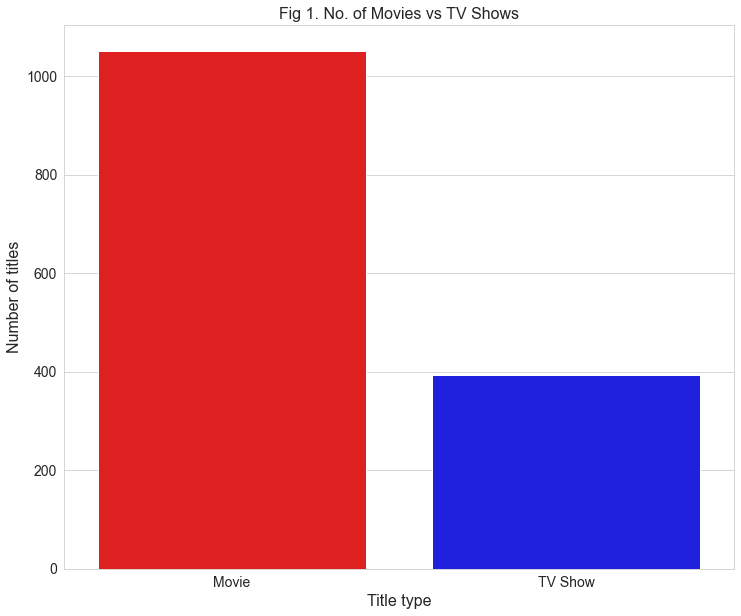

In [31]:
# Fig 1. Number of Movies vs TV Shows on Disney Plus

sns.set_style("whitegrid");
plt.figure(figsize=(12,10));
plt.title("Fig 1. No. of Movies vs TV Shows", fontsize=16);
mvtv = sns.countplot(x="type", data=full_data_df, palette=('Red', 'Blue'));
plt.xlabel('Title type', fontsize=16);
plt.xticks(fontsize=14)
plt.ylabel('Number of titles', fontsize=16);
plt.yticks(fontsize=14)
plt.show()
                                                           
# Over twice as many Movies as Tv Shows                                           

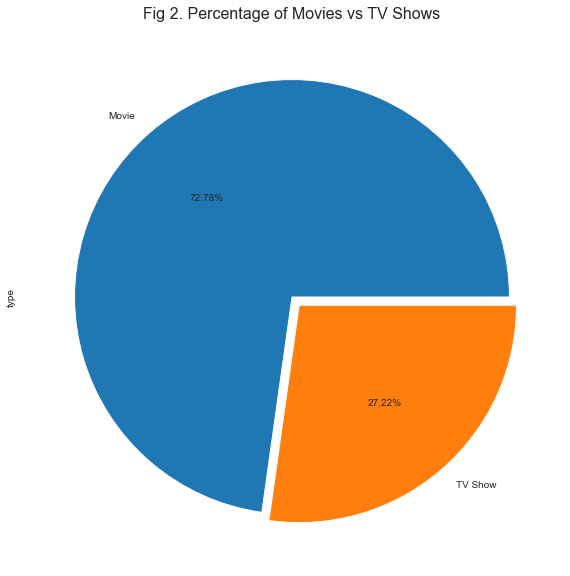

In [32]:
# Fig 2 Piechart showing percentage of movies vs TV Shows

plt.figure(figsize=(15,10));
plt.title("Fig 2. Percentage of Movies vs TV Shows", fontsize=16)
full_data_df.type.value_counts().plot(kind = 'pie', explode = [0,0.05], autopct = '%1.2f%%');
plt.show()


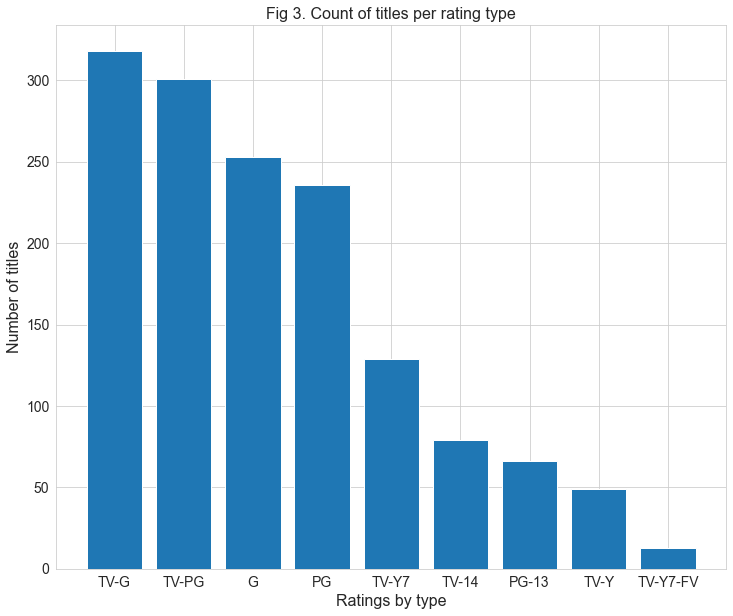

In [33]:
# Fig 3 Count of ratings across the dataset
plt.figure(figsize=(12,10));
values = full_data_df['rating'].value_counts().values;
ratings = full_data_df['rating'].value_counts().index;
plt.title('Fig 3. Count of titles per rating type', fontsize=16);
plt.bar(ratings, values);
plt.xlabel('Ratings by type', fontsize=16);
plt.xticks(fontsize=14);
plt.ylabel('Number of titles', fontsize=16);
plt.yticks(fontsize=14);
plt.show()

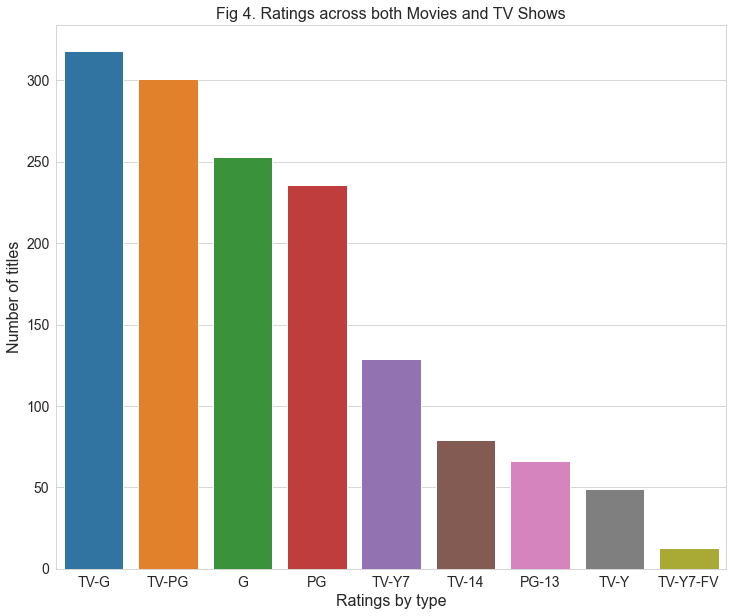

In [34]:
# Fig 4 Count of ratings across both movies and tv shows

plt.figure(figsize=(12,10));
plt.title("Fig 4. Ratings across both Movies and TV Shows",fontsize=16);
sns.countplot(data=full_data_df, x="rating", order=full_data_df['rating'].value_counts().index);
plt.xlabel('Ratings by type', fontsize=16);
plt.xticks(fontsize=14);
plt.ylabel('Number of titles', fontsize=16);
plt.yticks(fontsize=14);
plt.show()

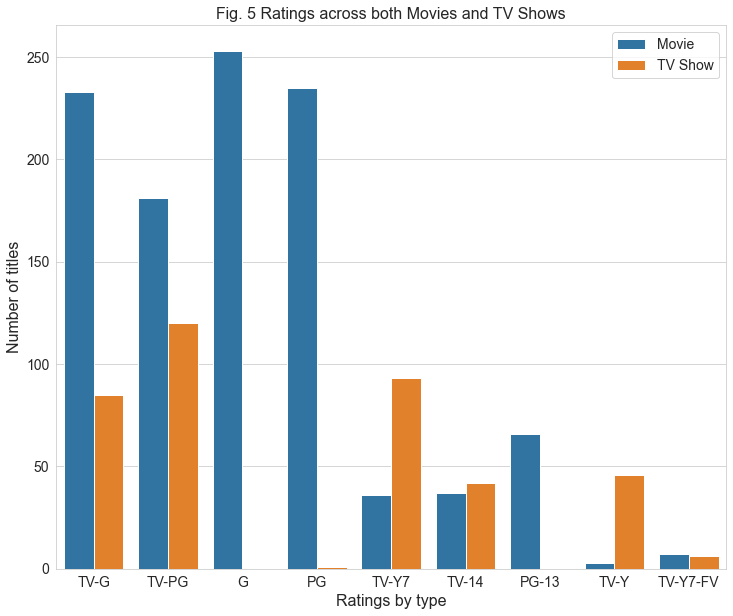

In [35]:
# Fig 5 Count of how the ratings look between Movies and TV Shows

plt.figure(figsize=(12,10));
plt.title("Fig. 5 Ratings across both Movies and TV Shows", fontsize=16);
sns.countplot(data=full_data_df, x="rating", hue='type', order=full_data_df['rating'].value_counts().index);
plt.legend(fontsize=14);
plt.xlabel('Ratings by type', fontsize=16);
plt.xticks(fontsize=14);
plt.ylabel('Number of titles', fontsize=16);
plt.yticks(fontsize=14);
plt.show()

GENRES

In [36]:
# Genres for the entire dataset

genre_count_fulldata = full_data_df['genre'].value_counts()
genre_count_fulldata

Animation, Comedy, Family                  124
Action-Adventure, Animation, Comedy         77
Action-Adventure, Animation, Kids           45
Action-Adventure, Animation, Family         40
Animals & Nature, Documentary, Family       40
                                          ... 
Coming of Age, Musical, Science Fiction      1
Coming of Age, Dance, Drama                  1
Crime, Drama, Family                         1
Animation, Anthology, Science Fiction        1
Animation, Drama, Fantasy                    1
Name: genre, Length: 328, dtype: int64

Duration times for Movies

In [37]:
disney_movies['duration'].isnull().sum()

# Making use of the separate data frame for movies to see if any blanks in the duration

0

In [38]:
disney_movies['duration'].value_counts()

# Quick check of how the different counts.

7 min      42
44 min     42
8 min      41
9 min      33
45 min     31
           ..
183 min     1
30 min      1
120 min     1
65 min      1
19 min      1
Name: duration, Length: 145, dtype: int64

In [39]:
disney_movies['duration']=disney_movies['duration'].str.replace(' min','')
disney_movies['duration']=disney_movies['duration'].astype(str).astype(int)
disney_movies['duration']

# Removing the 'min' from the duration

<ipython-input-39-3ac32b3f4575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_movies['duration']=disney_movies['duration'].str.replace(' min','')
<ipython-input-39-3ac32b3f4575>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_movies['duration']=disney_movies['duration'].astype(str).astype(int)


0        23
1        91
2        23
3        41
5        94
       ... 
1445    108
1446    106
1447    107
1448    112
1449      2
Name: duration, Length: 1051, dtype: int64

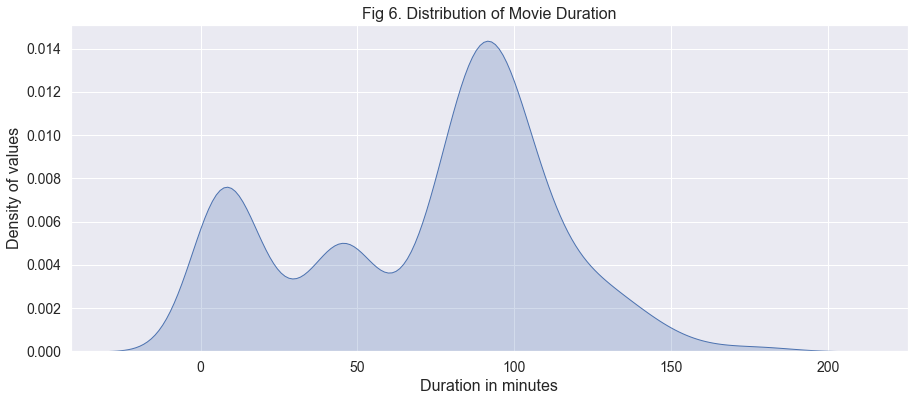

In [40]:
#Fig 6. Duration of movies by how many there are

plt.figure(figsize=(15,6));
sns.set(style="darkgrid");
sns.kdeplot(data=disney_movies['duration'],shade=True);
plt.title('Fig 6. Distribution of Movie Duration', fontsize=16)
plt.xlabel('Duration in minutes', fontsize=16);
plt.xticks(fontsize=14);
plt.ylabel('Density of values', fontsize=16);
plt.yticks(fontsize=14);
plt.show()

# High density means there are more of them in our dataset
# Large number between 60 mins at 110 mins

In [41]:
disney_movies['duration'].mean()

# Due to the outliers on either end, the mean may not be a fair representation of a "movie"

71.92863939105614

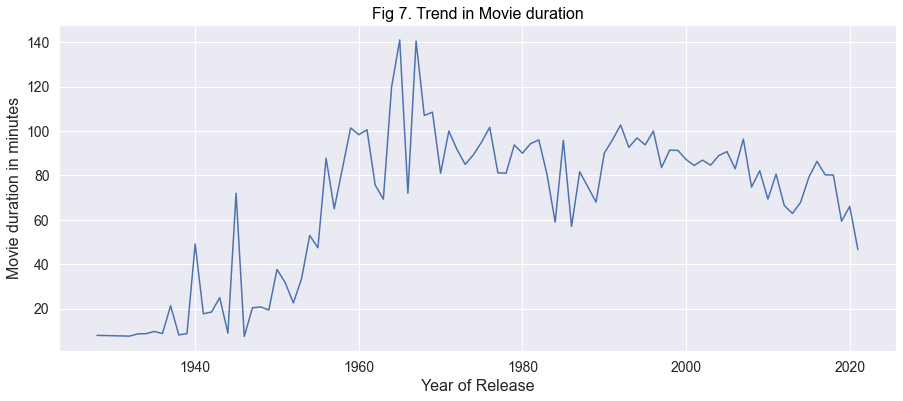

In [42]:
# Fig 7 Movie duration over the years

movie_duration_by_year = disney_movies.groupby(['original_release_year']).mean()
movie_duration_by_year = movie_duration_by_year.sort_index()

plt.figure(figsize=(15,6));
plt.title("Fig 7. Trend in Movie duration", fontsize=16, color='black');
sns.lineplot(x=movie_duration_by_year.index, y=movie_duration_by_year.duration.values);
plt.xlabel('Year of Release', fontsize=16);
plt.xticks(fontsize=14);
plt.ylabel('Movie duration in minutes', fontsize=16);
plt.yticks(fontsize=14);
plt.show()

# Longest movies in 1960-1970. Falling shorter and shorter thereafter 

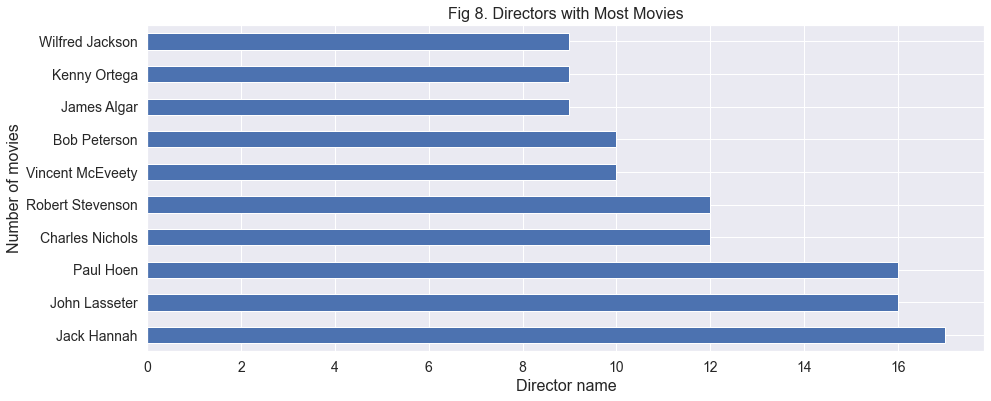

In [43]:
# Fig 8 Directors with most movies
# Dropping the "no data" lines for the premise of the graph

disney_movies_dir_top10 = disney_movies["director"].value_counts().head(11)
plt.figure(figsize=(15,6))
disney_movies_dir_top10.tail(10).plot(kind='barh')
plt.title("Fig 8. Directors with Most Movies", fontsize=16)
plt.xlabel('Director name', fontsize=16);
plt.xticks(fontsize=14);
plt.ylabel('Number of movies', fontsize=16);
plt.yticks(fontsize=14);
plt.show()

Web scraping

https://www.parkdeanresorts.co.uk/discover-more/discover/every-countrys-favourite-disney-plus-film-revealed/

class="disney-table"

In [44]:
disney_movie_search_2018 = requests.get('https://www.parkdeanresorts.co.uk/discover-more/discover/every-countrys-favourite-disney-plus-film-revealed/')
test = bs(disney_movie_search_2018.content, 'lxml')

In [45]:
table = test.find("table", {"class":"disney-table"})

In [46]:
pd.read_html(str(table))[0]

,0,1,2
0,Rank,Film,Annual Search Volume
1,1,Frozen,1.9 million
2,2,Avatar,1.8 million
3,3,Cars,589k
4,4,Aladdin,528k
5,5,A Bug's Life,469k
6,6,Cinderella,240k
7,7,Mulan,188k
8,8,Lion King,180k
9,9,High School Musical,168k
